# Import Libaries
The libraries needed to do Exploratory Data Analysis are imported here.

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset
The data consists of 48x48 pixel grayscale images of faces. 
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). 
The dataset is mainly composed of three files,they will be displayed separately : 
- train.csv
- test.csv
- icml_face_data.csv 






##  File "train.csv"
The file "train.csv" contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string is a space-separated pixel values in row major order.
This file represents the training set and consists of 28709 samples.

In [2]:
# Loading file "train.csv" into dataframe df_train
df_train =  pd.read_csv("/content/drive/MyDrive/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv",sep=",")
print("df_train :")
display(df_train)

df_train :


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


##  File "test.csv"
The "test.csv" file contains only the "pixels" column.
This file contains the samples included in the public test set and the final test set.
The public test set is used to submit your own challenge results and to update the challenge leaderboard (3589 samples).
The final test set however, is used to determine the winner of the challenge.(3589 samples).
In total,this file contains 7178 (incomplete) samples.


In [3]:
# Loading test.csv into dataframe df_test
df_test =  pd.read_csv("/content/drive/MyDrive/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv",sep=",")
print("df_test :")
display(df_test)

df_test :


,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


## File "icml_face_data.csv"
The file "icml_face_data.csv" combines the "train.csv" and "test.csv"  files in a single file, dividing the various samples by the value of the "usage" column and adding the labels to the samples of the "test.csv" file.
We will use mostly this file in this project.
The "icml_face_data.csv" file contains 3 columns, 
"emotion", "usage", "pixels":
- The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image
- The "usage" columns can assume 3 values:
  - Training : this sample is part of the training set
  - PrivateTest : this sample is part of the private test set (the one   originally used to submit results and update the leaderboard)
  - PublicTest : this sample is part of the public test set (the one originally used to determine the winner of the challenge) 
- pixels : contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order.


We will use the training set as training set,the private test set as the validation set and the public test set as the test set.
In total,in this file there are 35887 samples divided into training set (28709 samples), validation set (3589 samples) and test set (3589 samples)



In [48]:
# Loading icml_face_data.csv into dataframe df_icml
df_icml = pd.read_csv("/content/drive/MyDrive/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv",sep=",")

# Columns renamed for easier access.
df_icml.rename(columns = {' Usage':'usage'}, inplace = True)
df_icml.rename(columns = {' pixels':'pixels'}, inplace = True)
print("df_icml :")
display(df_icml)

# Here the unique values ​​assumed by the usage column are shown.
print("The usage column takes this unique values:")
print(df_icml["usage"].unique())

# Here we demonstrate that df_icml is composed of the samples of "train.csv" and those of "test.csv"
print("We have:\n %d samples for training.\n %d samples for validation. \n %d samples for testing." % (np.sum(df_icml["usage"]=="Training"),np.sum(df_icml["usage"]=="PrivateTest"),np.sum(df_icml["usage"]=="PublicTest")))


df_icml :


,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


The usage column takes this unique values:
['Training' 'PublicTest' 'PrivateTest']
We have:
 28709 samples for training.
 3589 samples for validation. 
 3589 samples for testing.


# Exploratory Data Analisys
In this section Exploratory Data Analysis will be done on the df_icml dataframe. The purpose of this analysis is to understand how the dataset is structured and to highlight some characteristics with the help of graphs.



## NaN values check


In [49]:
# Here the df_icml dataframe information are printed.
# We can use this method to see if there are NaN values ​​in each column of the dataframe.
print(df_icml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   usage    35887 non-null  object
 2   pixels   35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


## Visualizing Images and their emotions


In [50]:
# Transformation of pixel strings into float32 matrix using lambda function
df_icml["pixels"] = df_icml['pixels'].apply(lambda x: np.array(x.split()).reshape(48, 48).astype('float32'))
display(df_icml)
print(df_icml.info)

,emotion,usage,pixels
0,0,Training,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63..."
1,0,Training,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11..."
2,2,Training,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16..."
3,4,Training,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20..."
4,6,Training,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...
35882,6,PrivateTest,"[[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39..."
35883,3,PrivateTest,"[[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19..."
35884,0,PrivateTest,"[[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17..."
35885,3,PrivateTest,"[[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68..."


<bound method DataFrame.info of        emotion        usage                                             pixels
0            0     Training  [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1            0     Training  [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2            2     Training  [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...
3            4     Training  [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
4            6     Training  [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
...        ...          ...                                                ...
35882        6  PrivateTest  [[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39...
35883        3  PrivateTest  [[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19...
35884        0  PrivateTest  [[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17...
35885        3  PrivateTest  [[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68...
35886        2  PrivateTest  [[19.0, 13.0, 14.0, 12.0, 13.0, 16.0, 21.0, 33...

[35887 rows x 3 col

Surprise


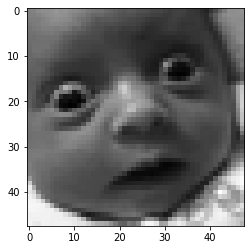

In [58]:
# Here we visualize some images from the dataframe
emotions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
plt.imshow(df_icml["pixels"][9595],cmap="gray")
print(emotions[df_icml["emotion"][9595]])
